In [1]:
import numpy as np
from __future__ import print_function

import matplotlib as mpl
import matplotlib.pyplot as plt
% matplotlib inline

# Generate a mock dataset

In [62]:
# first generate the centers and standard deviations of 3d gaussians
seed = 9
np.random.seed(seed)
ngauss = 25 # using 25 gaussians to make something seemingly complicated
centers = np.random.normal(scale=1., size=(ngauss, 3))
scales = np.random.uniform(low=0.2, high=0.7, size=ngauss)

In [63]:
nrows = 3e5
nrows_per_gauss = int(nrows) // ngauss

samples = []
for i in np.arange(ngauss):
    samples.append(np.random.normal(loc=centers[i], scale=scales[i], size=(nrows_per_gauss, 3)))
samples = np.vstack(samples)
samples[:, 2] += 10

# Make histogram

In [64]:
nbins = 100
# define the bins edges
x_edges = np.linspace(-3.5, 3.5, nbins+1)
y_edges = np.linspace(-3.5, 3.5, nbins+1)
bins = (x_edges, y_edges)

Text(0,0.5,'Y')

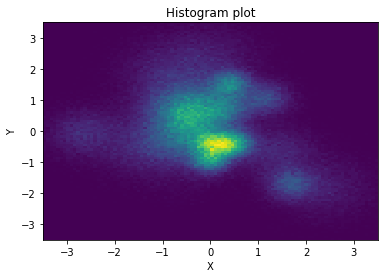

In [65]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.hist2d(samples[:, 0], samples[:, 1], bins=bins)
ax.set_title("Histogram plot")
ax.set_xlabel("X")
ax.set_ylabel("Y")

# Make simple contour plot

In [66]:
nbins = 100
# define the bins edges
x_edges = np.linspace(-3.5, 3.5, nbins+1)
y_edges = np.linspace(-3.5, 3.5, nbins+1)
bins = (x_edges, y_edges)

# calculate bin mid points as centers
xcens = x_edges[:-1] + np.diff(x_edges) / 2.
ycens = y_edges[:-1] + np.diff(y_edges) / 2.

xx, yy = np.meshgrid(xcens, ycens)

Text(0,0.5,'#')

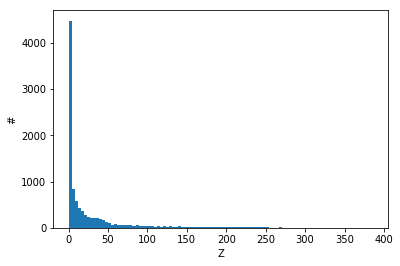

In [67]:
fig = plt.figure()
ax = fig.add_subplot(111)

counts = np.histogram2d(samples[:, 0], samples[:, 1], bins=bins)[0]

ax.hist(counts.flatten(), bins=100)

ax.set_xlabel("Z")
ax.set_ylabel("#")

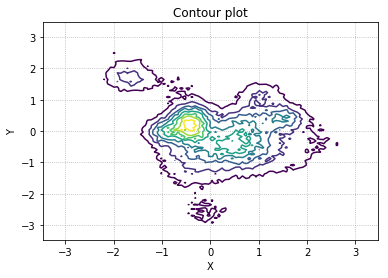

In [68]:
fig = plt.figure()
ax = fig.add_subplot(111)


counts = np.histogram2d(samples[:, 0], samples[:, 1], bins=bins)[0]

contour_levels = np.linspace(0, 400, 10)
ax.contour(xx, yy, counts, contour_levels)


ax.set_title("Contour plot")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.grid(ls=":")

# Contour plot of f(Z)

In [82]:
nbins = 40
# define the bins edges
x_edges = np.linspace(-3.5, 3.5, nbins+1)
y_edges = np.linspace(-3.5, 3.5, nbins+1)
bins = (x_edges, y_edges)

# calculate bin mid points as centers
xcens = x_edges[:-1] + np.diff(x_edges) / 2.
ycens = y_edges[:-1] + np.diff(y_edges) / 2.

xx, yy = np.meshgrid(xcens, ycens)

In [83]:
zz = np.zeros(shape=xx.shape)
for i in np.arange(nbins):
    for j in np.arange(nbins):
        index = ((samples[:, 0] > x_edges[i]) & (samples[:, 0] < x_edges[i + 1]) &
                 (samples[:, 1] > y_edges[j]) & (samples[:, 1] < y_edges[j + 1]))
#         print()
        zz[i, j] = samples[index, 2].sum()

/home/moon/vargatn/anaconda3/envs/galsim/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'fmt'
  s)


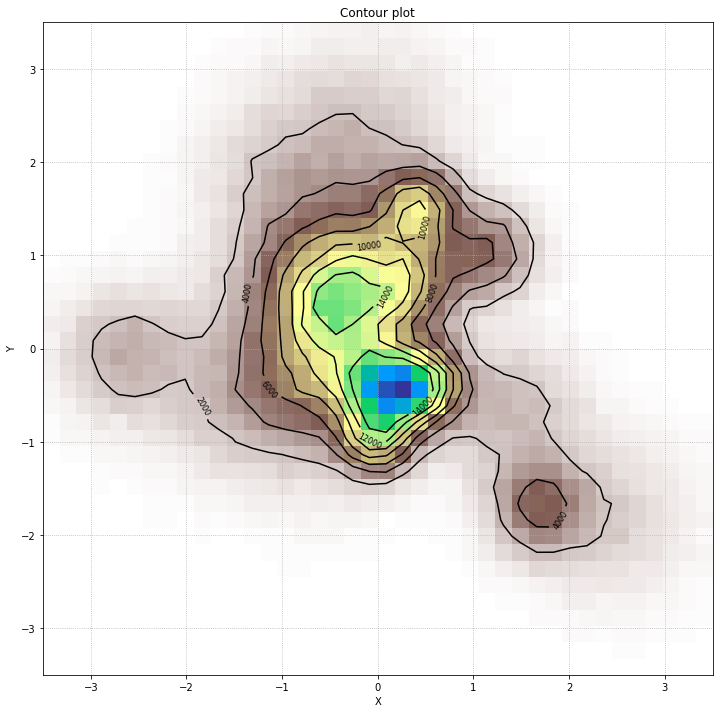

In [121]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)


ax.hist2d(samples[:, 0], samples[:, 1], bins=bins, cmap=plt.cm.terrain_r)

contour_levels = np.arange(0, 16000, 2000)
cs = ax.contour(xx.T, yy.T, zz, contour_levels, colors='k', fmt="s")

fmt = {}
strs = ["{:d}".format(int(level)) for level in contour_levels[1:]]
for l, s in zip(cs.levels, strs):
    fmt[l] = s

ax.clabel(cs, cs.levels, fmt=fmt, fontsize=8, inline=True)


ax.set_title("Contour plot")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.grid(ls=":")